<a href="https://colab.research.google.com/github/SujitVarma299/2311cs020685/blob/main/AD(_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np


from google.colab import files
import pandas as pd

upload =files.upload()
a=list(upload.keys())[0]
df = pd.read_csv(a)
df

Saving Cars.csv to Cars.csv


,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [5]:
import statsmodels.formula.api as smf
model = smf.ols('MPG~WT+VOL+SP+HP',data=df).fit()

In [6]:
model.params

,0
Intercept,30.677336
WT,0.400574
VOL,-0.336051
SP,0.395627
HP,-0.205444


In [7]:
print(model.tvalues,'\n',model.pvalues)


Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [8]:
(model.rsquared,model.rsquared_adj)


(0.7705372737359842, 0.7584602881431413)

In [9]:
ml_wv = smf.ols('MPG~VOL+SP+HP',data=df).fit()


In [10]:
print(ml_wv.tvalues,'\n',ml_wv.pvalues)


Intercept    2.068548
VOL         -8.928340
SP           2.570678
HP          -5.353199
dtype: float64 
 Intercept    4.194554e-02
VOL          1.648229e-13
SP           1.207855e-02
HP           8.644870e-07
dtype: float64


In [11]:
rsq = model.rsquared
rsq_wv = ml_wv.rsquared
vif = 1/(1-rsq)
vif_wv = 1/(1-rsq_wv)
print(vif,vif_wv)

4.358006270915729 4.354800229872512


In [12]:
rsq_hp = smf.ols('MPG~WT+VOL+SP',data=df).fit().rsquared
vif_hp = 1/(1-rsq_hp)
vif_hp

3.20180374562394

In [14]:
rsq_hp = smf.ols('VOL~WT+SP+HP',data=df).fit().rsquared
vif_hp = 1/(1-rsq_hp)
vif_hp

638.8060836592878

In [15]:
rsq_hp = smf.ols('SP~WT+VOL+HP',data=df).fit().rsquared
vif_hp = 1/(1-rsq_hp)
vif_hp

20.00763878305008

In [16]:
Vif_frame = pd.DataFrame({'Variables':['WT','VOL','SP','HP'],'VIF':[vif,vif_wv,vif_hp,vif_hp]})
Vif_frame

,Variables,VIF
0,WT,4.358006
1,VOL,4.354800
2,SP,20.007639
3,HP,20.007639


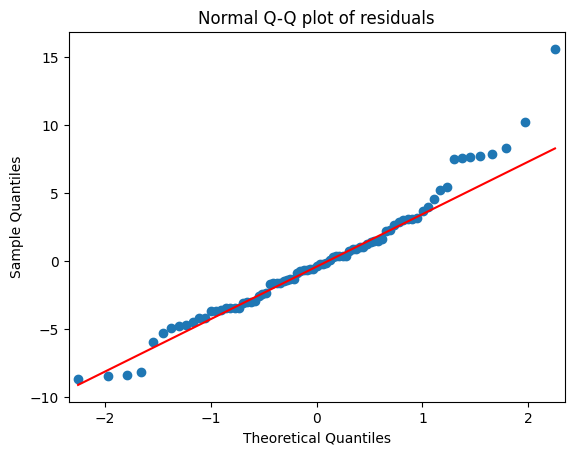

In [17]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [18]:
def get_standardized_values(vals):
  return (vals-vals.mean())/vals.std()


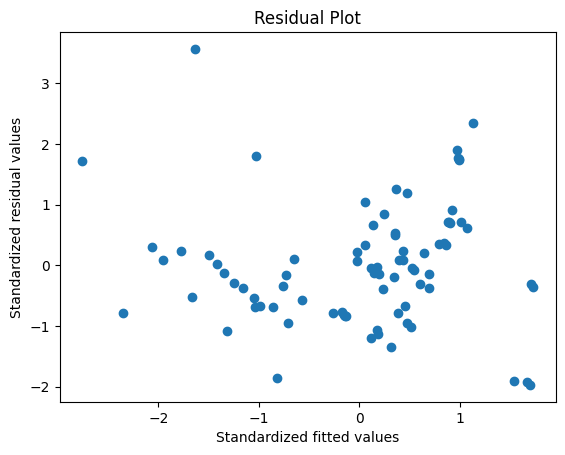

In [19]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [20]:
list(np.where(model.resid>18660))

[array([], dtype=int64)]

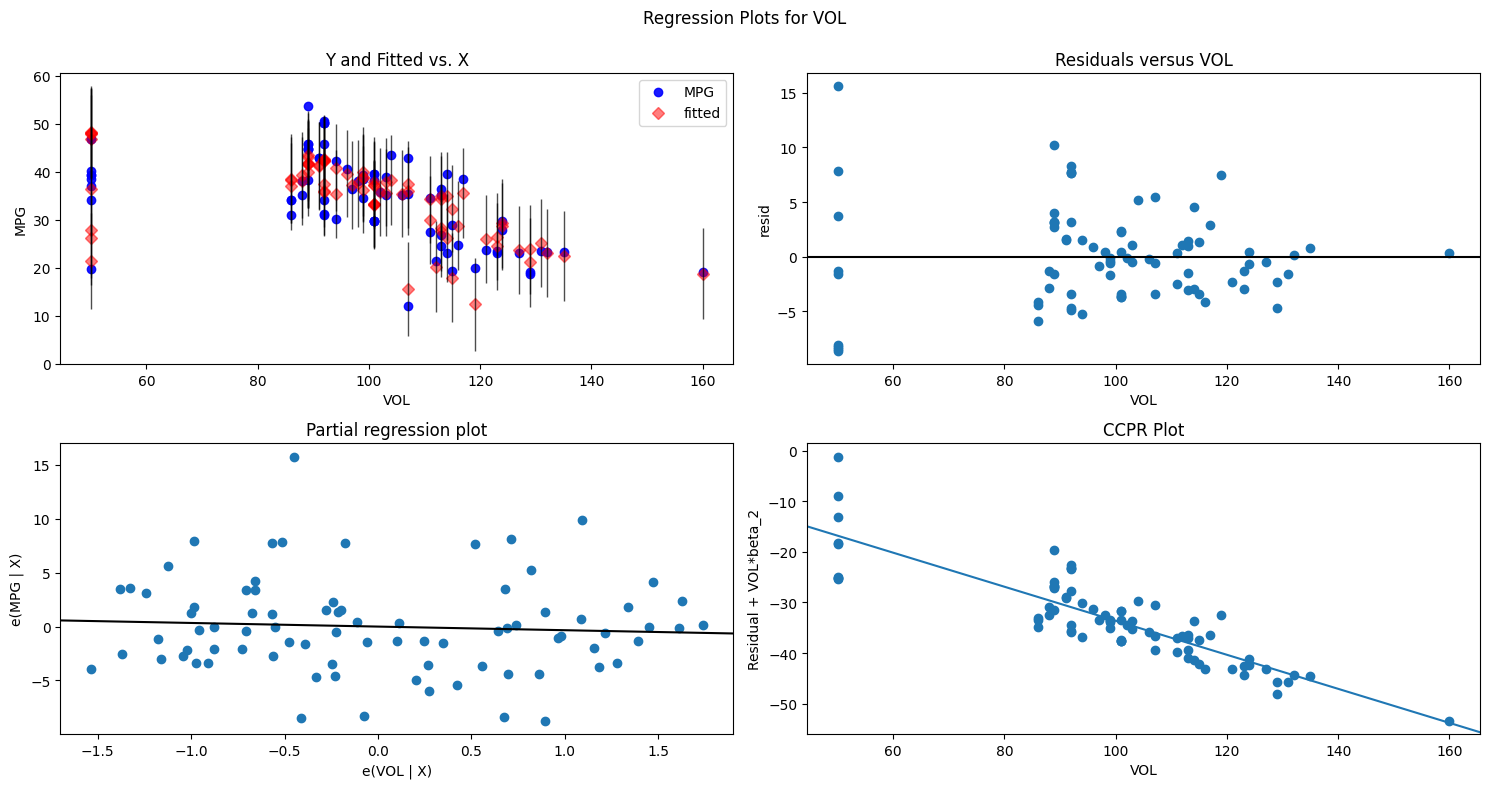

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'VOL',fig=fig)
plt.show()


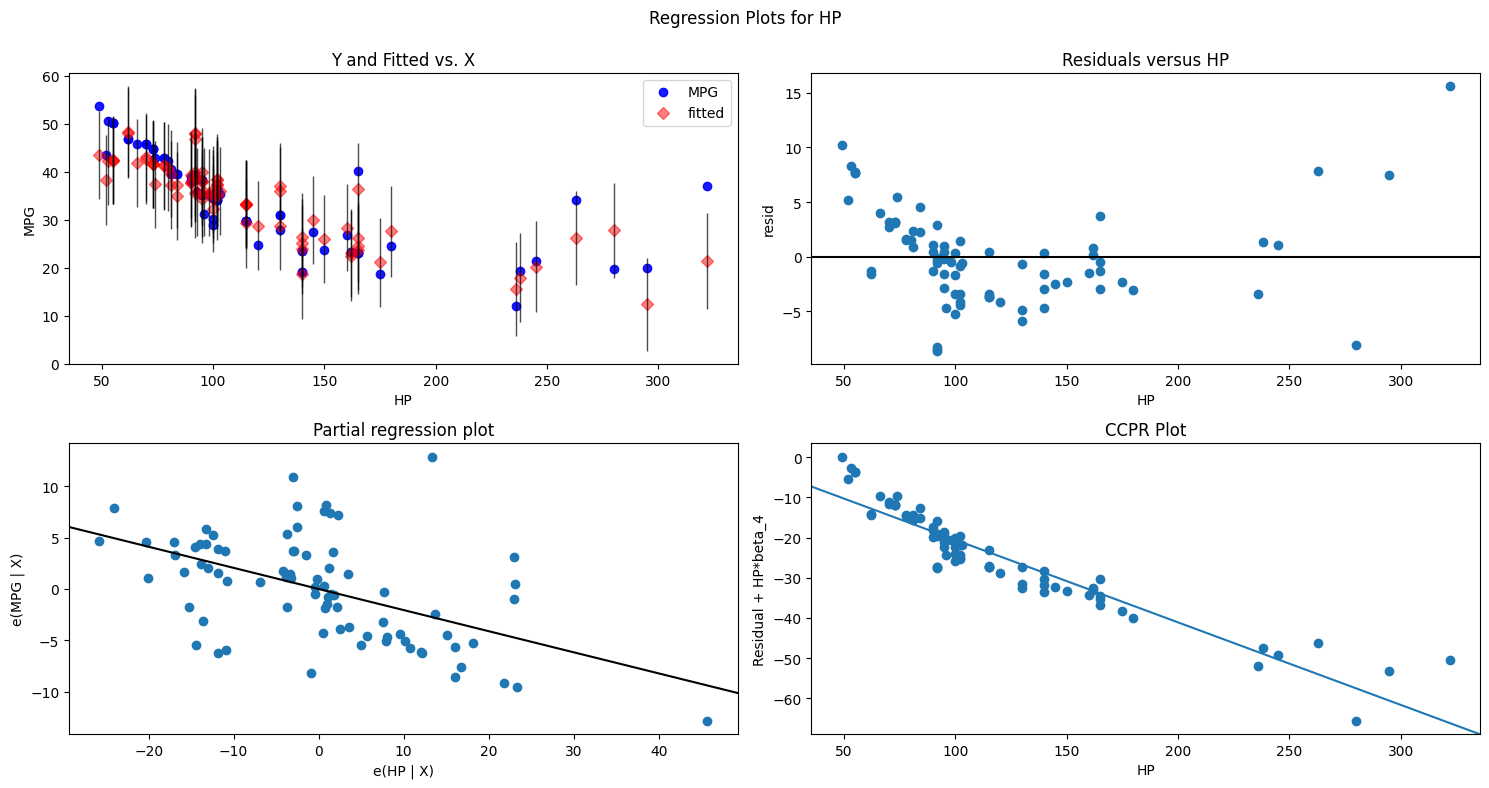

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

In [42]:
final_ml_V = smf.ols("MPG~VOL+SP+HP",data = df).fit()

In [43]:
(final_ml_V.rsquared,final__ml_V.aic)

(0.770368341321302, 475.9875158854609)

In [44]:
final_ml = smf.ols("MPG~VOL+SP",data = df).fit()

In [45]:
(final_ml_V.rsquared,final__ml_V.aic)

(0.770368341321302, 475.9875158854609)

In [46]:
final_ml_W = smf.ols("MPG~VOL+SP+HP",data = df).fit()

In [47]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.770368341321302, 475.9875158854609)

In [48]:
final_ml_V.predict(df)

,0
0,43.590769
1,42.256794
2,42.256794
3,42.361497
4,42.269544
...,...
76,21.233143
77,17.867725
78,26.216856
79,12.237554


In [49]:
final_ml_V.predict(df)[0:5]
pred_df = pd.DataFrame(final_ml_V.predict(df))
pred_df.head()

,0
0,43.590769
1,42.256794
2,42.256794
3,42.361497
4,42.269544


In [51]:
final_ml_V.predict(df)[0:5]
pred_df = pd.DataFrame(final_ml_V.predict(df))
pred_df.head()

,0
0,43.590769
1,42.256794
2,42.256794
3,42.361497
4,42.269544


In [55]:
read_csv = pd.read_csv(a)
read_csv.head()


,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [56]:
new_data = pd.DataFrame({'HP':40,'Vol':95,'SP':102,'WT':35},index=[1])